![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline

In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


<AxesSubplot:>

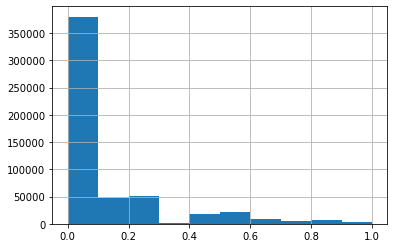

In [4]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [5]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [6]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text
import re
import string
from nltk.stem import PorterStemmer
porter_stemmer=PorterStemmer()

def limpiar(texto):
    # Eliminación de signos de puntuación
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    nuevo_texto = re.sub(regex , ' ', str(texto))
    # Eliminación de números
    nuevo_texto = re.sub("\d+", ' ', str(nuevo_texto))
    # Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub("\\s+", ' ', str(nuevo_texto))
    # Tokenización por palabras individuales
    nuevo_texto = nuevo_texto.split(sep = ' ')
    # Eliminación de tokens con una longitud < 2
    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]
    #words=re.split("\\s+",str(nuevo_texto))
    #stemmed_words=[porter_stemmer.stem(word=word) for word in words]
    #return ' '.join(stemmed_words)
    
    return(nuevo_texto)

limpiar(X)
X.head()

0    What are you talking about? What group do Pete...
1     NO!, Let him, we need a Conservative government.
2    Perhaps he took the "power out of the Cardinal...
3    As always, yours is dripping with sarcasm, whi...
4    The dirty little secret is that the price rang...
Name: comment_text, dtype: object

In [7]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [8]:
# Celda 1
vect_A = CountVectorizer(min_df=3, lowercase=True, stop_words='english')
X_dt_A = vect_A.fit(X_train)
X_dtm_A= X_dt_A.transform(X_train)
print(X_dtm_A.shape)
print(vect_A.get_feature_names()[-150:-100])
vect_A.vocabulary_

(362779, 57619)
['zenophobia', 'zephyr', 'zero', 'zeroed', 'zeroes', 'zerohedge', 'zeroing', 'zeros', 'zervos', 'zest', 'zeus', 'zhe', 'zi', 'ziegler', 'zig', 'zika', 'zilch', 'zille', 'zillion', 'zillions', 'zillow', 'zim', 'zimbabwe', 'zimbabwean', 'zimbabweans', 'zimmer', 'zimmerman', 'zinc', 'zine', 'zing', 'zinger', 'zingers', 'zinke', 'zinn', 'zio', 'zion', 'zionism', 'zionist', 'zionists', 'zip', 'zipped', 'zipper', 'zipping', 'zippo', 'zippy', 'zir', 'zit', 'zobel', 'zobels', 'zoe']


{'oral': 36680,
 'history': 24680,
 'say': 45294,
 'nazis': 34856,
 '1930': 504,
 'did': 15209,
 'eugenic': 18613,
 'experiments': 19091,
 'native': 34787,
 'children': 10067,
 'mcgill': 32385,
 'knowledge': 29207,
 'government': 22672,
 'yup': 57388,
 'happened': 23740,
 'didn': 15218,
 'marijuana': 31925,
 'harmful': 23824,
 'human': 25368,
 'health': 24109,
 'cigarettes': 10325,
 'widely': 56387,
 'used': 54576,
 'ban': 5507,
 'reduces': 42594,
 'stress': 49481,
 'aggression': 2806,
 'level': 30239,
 'leading': 29915,
 'crime': 13046,
 'medical': 32549,
 'value': 54771,
 'favorable': 19706,
 'effects': 17356,
 'scientifically': 45536,
 'proven': 40984,
 'author': 5005,
 'consideration': 11968,
 'use': 54573,
 'legalized': 30056,
 'market': 31958,
 'transparent': 52496,
 'surely': 50168,
 'better': 6394,
 'illegal': 25864,
 'sales': 44988,
 'drug': 16731,
 'cases': 9165,
 'young': 57338,
 'adult': 2560,
 'drugs': 16738,
 'need': 34943,
 'cause': 9348,
 'problems': 40577,
 'bigger': 6

Text(0, 0.5, 'r2_scores')

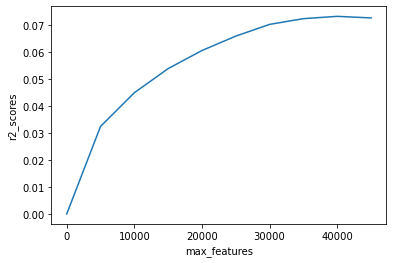

In [9]:
# Creación de lista de valores para iterar sobre diferentes valores de max_features
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
estimator_range = range(1, 50000, 5000)

# Definición de lista para almacenar el r2 promedio para cada valor de max_features
r2_scores1 = []

# Uso de un 5-fold cross-validation para cada valor de max_features
for feature in estimator_range:
    clf = RandomForestRegressor(max_depth=1, max_features=feature, random_state=1, n_jobs=-1)
    r2_scores1.append(cross_val_score(clf, X_dtm_A, y_train, cv=5, scoring='r2').mean())
    
# Gráfica del desempeño del modelo vs la cantidad de max_features
plt.plot(estimator_range, r2_scores1)
plt.xlabel('max_features')
plt.ylabel('r2_scores')

In [10]:
from sklearn.ensemble import RandomForestRegressor
# Import the model we are using
rfr = RandomForestRegressor(max_depth=5, random_state = 42)
# Train the model on training data
rfr.fit(X_dtm_A, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [11]:
X_dtm_A1= X_dt_A.transform(X_test)
y_pred= rfr.predict(X_dtm_A1)
MSERFR=np.average(np.square(y_pred-y_test))
print('MSE Random Forest Regressor:')
print(MSERFR)

MSE Random Forest Regressor:
0.033292356237962374


In [12]:
rfr1 = RandomForestRegressor(max_features=40000,max_depth=5, random_state = 42)
# Train the model on training data
rfr1.fit(X_dtm_A, y_train)
X_dtm_A11= X_dt_A.transform(X_test)
y_pred1= rfr1.predict(X_dtm_A11)
MSERFR1=np.average(np.square(y_pred1-y_test))
print('MSE Random Forest Regressor:')
print(MSERFR1)

MSE Random Forest Regressor:
0.03305060453139435


## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [13]:
# Celda 2
vect_B = CountVectorizer(min_df=3, lowercase=True, ngram_range=(3, 3), stop_words='english')
X_dt_B = vect_B.fit(X_train)
X_dtm_B= X_dt_B.transform(X_train)
print(X_dtm_B.shape)
print(vect_B.get_feature_names()[-150:-100])

(362779, 71788)
['young fan beat', 'young feeling left', 'young healthy people', 'young lady just', 'young man dead', 'young man did', 'young man died', 'young man doing', 'young man family', 'young man just', 'young man killed', 'young man know', 'young man murdered', 'young man tried', 'young men aged', 'young men need', 'young men today', 'young men women', 'young middle aged', 'young ohio dan', 'young ones reason', 'young people attended', 'young people church', 'young people continue', 'young people don', 'young people especially', 'young people face', 'young people families', 'young people getting', 'young people going', 'young people just', 'young people know', 'young people like', 'young people look', 'young people make', 'young people making', 'young people need', 'young people parents', 'young people pay', 'young people people', 'young people quickly', 'young people start', 'young people teach', 'young people think', 'young people today', 'young people use', 'young people wan

In [14]:
from sklearn.ensemble import RandomForestRegressor
# Import the model we are using
rfr2 = RandomForestRegressor(max_depth=5, random_state = 42)
# Train the model on training data
rfr2.fit(X_dtm_B, y_train)
X_dtm_B1= X_dt_B.transform(X_test)
y_pred2= rfr2.predict(X_dtm_B1)
MSERFR2=np.average(np.square(y_pred2-y_test))
print('MSE Random Forest Regressor n-gram:')
print(MSERFR2)

MSE Random Forest Regressor n-gram:
0.038902712735115946


Text(0, 0.5, 'r2_scores')

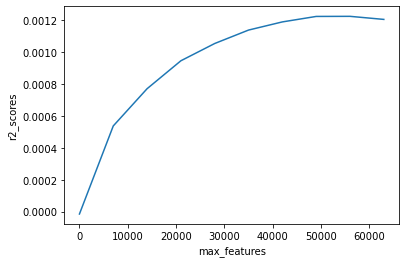

In [15]:
# Creación de lista de valores para iterar sobre diferentes valores de max_features
estimator_range = range(1, 70000, 7000)

# Definición de lista para almacenar el r2 promedio para cada valor de max_features
r2_scores = []

# Uso de un 5-fold cross-validation para cada valor de max_features
for feature in estimator_range:
    clf = RandomForestRegressor(max_depth=1, max_features=feature, random_state=1, n_jobs=-1)
    r2_scores.append(cross_val_score(clf, X_dtm_B, y_train, cv=5, scoring='r2').mean())
    
# Gráfica del desempeño del modelo vs la cantidad de max_features
plt.plot(estimator_range, r2_scores)
plt.xlabel('max_features')
plt.ylabel('r2_scores')

In [16]:
rfr3 = RandomForestRegressor(max_features=50000,max_depth=5, random_state = 42)
# Train the model on training data
rfr3.fit(X_dtm_B, y_train)
X_dtm_B11= X_dt_B.transform(X_test)
y_pred3= rfr3.predict(X_dtm_B11)
MSERFR3=np.average(np.square(y_pred3-y_test))
print('MSE Random Forest Regressor n-gram:')
print(MSERFR3)

MSE Random Forest Regressor:
0.03890268711979959


## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

La función TfidfVectorizer busca transformar un conjunto de textos en una respresentación numérica del impacto de cada palabra dentro de cada texto. Esta función calcula y multiplica dos componentes, tf e idf. Los cuales se pueden entender como:

Teniendo un Conjunto (C) de documentos (d) que contienen cada uno palabras (p) se construyen los siguientes factores:

tf: (Term Frecuency) Frecuencia del Término, es la división del número de veces que una palabra (p) aparece en un documento sobre el total de palabras del documento. idf: (Inverse Document Frequency) Inversa de la frecuencia del documento, es el logaritmo del número de de documentos sobre el número de documentos que contienen la palabra p.

El termino tfidf es la múltiplicación de tf y idf: tfidf(p,d,C) = tf(p,d)* Idf(p,C), donde p es una palabra particular, de un documento particular (d) y C el conjunto de documentos.

Esto hace que palabras poco comunes dentro del conjunto los documentos tengan un alto tfdidf y palabras muy comunes tengan un bajo tfidf (casi cero).

La función retorna un matriz donde las filas corresponden a los documentos y las columnas las palabras. La matriz se alimenta con el resultado de la multiplicación tf*idf para cada documento y para cada palabra.

Al comparar con CountVectorizer vemos como ventaja que la función TfidfVectorizer genera más información respecto del impacto de la palabra dentro del conjunto de documentos, más allá de las frecuencias en la oración. También el td-idf es más rápido al momento de ejecutar.

Una desventaja es que al igual que countvectorizer no proporciona información semántica sobre las palabras, como el significado real de las palabras. Además, si se está tratando de encontrar los n-gramas más frecuentes de cualquier longitud, es difícil comparar frecuencias entre n-gramas de diferente longitud. 

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [17]:
# Celda 4

tfidvector = TfidfVectorizer(min_df=3,lowercase=True,stop_words='english')

X_dtm_C = tfidvector.fit(X_train)
X_dtm_C1= X_dtm_C.transform(X_train)
random=RandomForestRegressor(max_depth=5,random_state=0)
random.fit(X_dtm_C1,y_train)
X_testC=X_dtm_C.transform(X_test)
predicciones=random.predict(X_testC)
MSERFR4=np.average(np.square(predicciones-y_test))

print('El MSE con el método Tfidf vectorizer y Random forest:')
print(MSERFR4)


El MSE con el método Tfidf vectorizer y Random forest:
0.033053242904086254


In [20]:
tfidvectortri = TfidfVectorizer(min_df=3,lowercase=True,stop_words='english', ngram_range=(3, 3))

X_dtm_Ctri = tfidvectortri.fit(X_train)
X_dtm_Ctri1 = X_dtm_Ctri.transform(X_train)
random.fit(X_dtm_Ctri1,y_train)
X_testCtri=tfidvectortri.transform(X_test)
predicciones1=random.predict(X_testCtri)
MSERFR5=np.average(np.square(predicciones1-y_test))

print('El MSE con el método Tfidf vectorizer, Random forest y trigramas es:')
print(MSERFR5)


El MSE con el método Tfidf vectorizer, Random forest y trigramas es:
0.0389028834803939


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

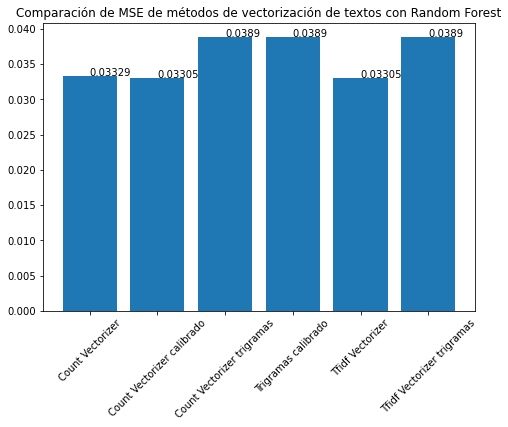

In [23]:
# Celda 5

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de MSE de métodos de vectorización de textos con Random Forest")
ejeX = ['Count Vectorizer','Count Vectorizer calibrado', 'Count Vectorizer trigramas','Trigramas calibrado','Tfidf Vectorizer','Tfidf Vectorizer trigramas']
ejeY = [round(MSERFR,5),round(MSERFR1,5),round(MSERFR2,5),round(MSERFR3,5),round(MSERFR4,5),round(MSERFR5,5)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

Respecto al procesamiento resulta importante hacer una limpieza de la información textual antes de hacer la partición de muestras. Esto a razón de que se disminuye el número de variables que permiten una implementación más rápida de los modelos.
Sin embargo, el reto está en decidir qué tanto debe eliminarse del texto, para esto, las librerías cuentan con ayudas de tipo min/max_df, max_features y stop_words (que tiene un vocabulario per se, pero también se pueden escoger las palabras que uno desee). Para nuestro trabajo hicimos una iteración del número de variables para encontrar cuál max_feature nos arroja un mejor MSE. Si bien mejora el resultado al tomar en este caso menos variables, la diferencia no varía mucho de si se tuvieran en cuenta todas las variables. Al comparar todos los modelos los mejores son el Count Vectorizer Calibrado y el tf-idf vectorizer.